In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [38]:
train = pd.read_csv('titanic_train.csv')

In [40]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


### Eploratory data analysis

In [6]:
# how many are not null
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

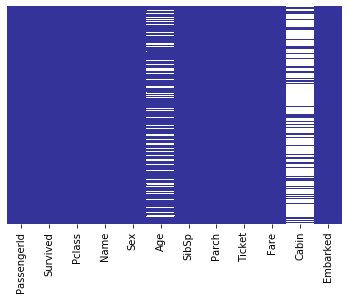

In [13]:
sns.heatmap(data=train.isnull(), yticklabels=False, cbar=False, cmap='terrain')
# we are missing age information, and cabin information
# we are missing a lot of cabin data

In [25]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

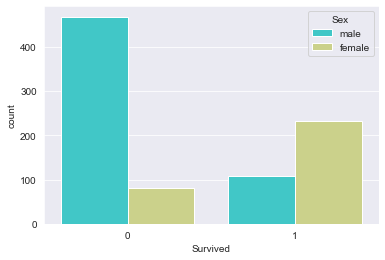

In [28]:
# How many survived per sex?
sns.set_style("darkgrid")
sns.countplot(x='Survived', hue='Sex',data=train, palette="rainbow");

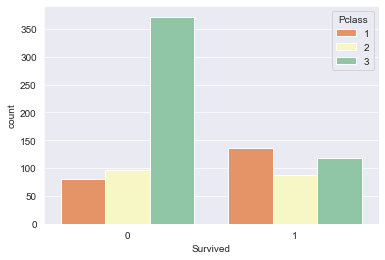

In [31]:
#and per class?
sns.countplot(x='Survived', hue='Pclass', data=train, palette="Spectral")

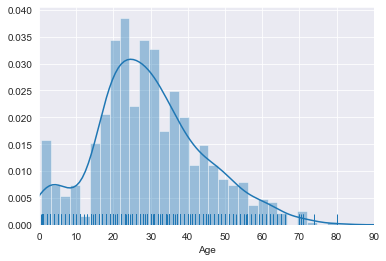

In [34]:
plt.xlim(0, 90)

# print people older than 70 y o
# print(train[train['Age']>70]);

sns.distplot(train['Age'].dropna(), bins=30, rug=True)
# rugplot : Draw small vertical lines to show each observation in a distribution.

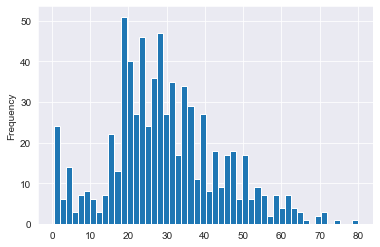

In [35]:
# Alternative way to make the same graph than distplot
train['Age'].plot.hist(bins=50)

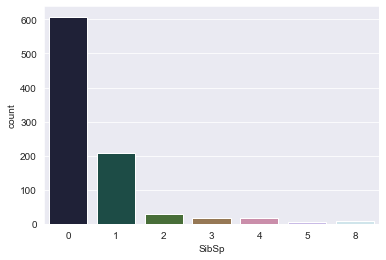

In [14]:
# explore siblings
sns.countplot(x='SibSp', data=train, palette="cubehelix")
# no children or spouse on board
# a lot of single people on board

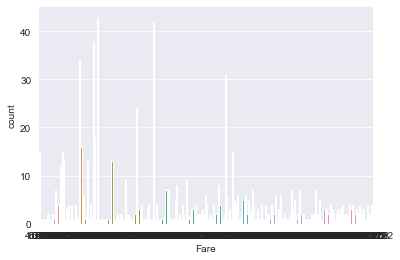

In [15]:
sns.countplot(x='Fare', data=train)

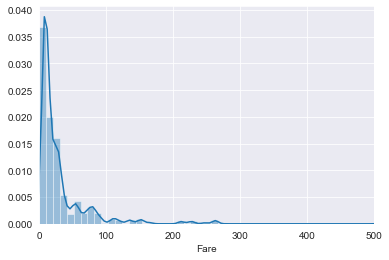

In [16]:
plt.xlim(0,500)
sns.distplot(train['Fare'])
# most passengers back in the cheap class

In [17]:
import cufflinks as cf

In [18]:
cf.go_offline()

In [19]:
train['Fare'].iplot(kind='hist')

### After grabbing contextual information and making assumption, exploration is done

# Part 2 : cleaning the data

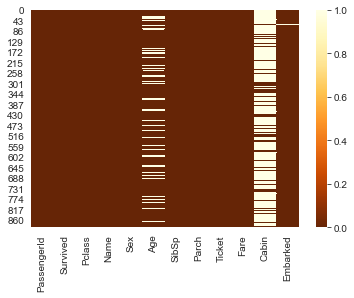

In [20]:
sns.heatmap(data=train.isnull(), cmap='YlOrBr_r')

Filling the missing with the average per class.


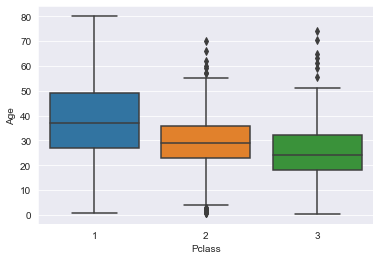

In [21]:
plt.figsize=(10,7)
sns.boxplot(x='Pclass', y='Age', data=train)
# wealth inputates with age
# let's impute the age!


In [22]:
train[train['Pclass']==1]['Age'].mean()

38.233440860215055

In [23]:
train[train['Pclass']==2]['Age'].mean()

29.87763005780347

In [24]:
train[train['Pclass']==3]['Age'].mean()

25.14061971830986

In [25]:
def inpute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return train[train['Pclass']==1]['Age'].mean()
        elif pclass == 2:
            return train[train['Pclass']==2]['Age'].mean()
        elif pclass == 3:
            return train[train['Pclass']==3]['Age'].mean()
    else:
        return age

In [26]:
train['Age'] = train[['Age','Pclass']].apply(inpute_age, axis=1)

In [27]:
train['Age']

0      22.00000
1      38.00000
2      26.00000
3      35.00000
4      35.00000
         ...   
886    27.00000
887    19.00000
888    25.14062
889    26.00000
890    32.00000
Name: Age, Length: 891, dtype: float64

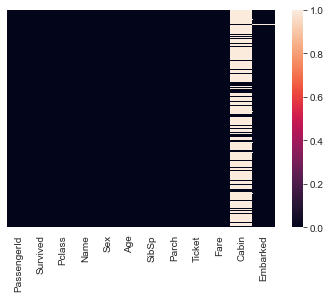

In [28]:
sns.heatmap(data=train.isnull(), yticklabels=False)
# y tick will give all the possible ages!

In [29]:
# too much misisng information on cabins, let's drop it
train.columns
train.drop('Cabin', axis=1, inplace=True)

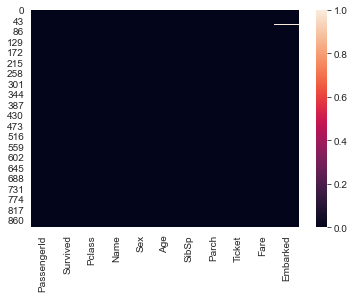

In [30]:
sns.heatmap(data=train.isnull())

In [31]:
#drop missing values
train.dropna(inplace=True)

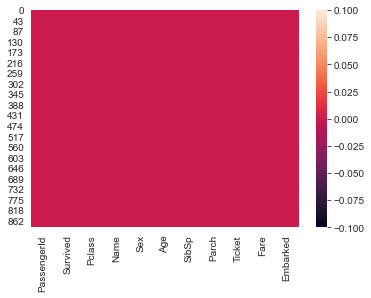

In [32]:
sns.heatmap(data=train.isnull())
# all is filled now!

We need a dummy variable to transform female and male.


In [33]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
    # Convert categorical variable into dummy/indicator variables.

In [34]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [35]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [36]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [37]:
# concat those new columns to the dataframe
train = pd.concat([train,sex,embark], axis=1)

In [38]:
cond1 = train['Sex']=='female'
#train[train['Survived']==1 & train['Sex']=='female']
# we don't need a lot of shit anymore

In [39]:
cond2 = train['Survived']==1 

In [40]:
train[cond1 & cond2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,C,0,0,0
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,C,0,0,0
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C,0,0,0
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,S,0,0,1


In [41]:
# Looking good, everything concatinated, all is numerical

In [42]:
train.drop(['Name', 'Embarked','Sex','Ticket'], axis=1, inplace=True)

In [46]:
train.drop('PassengerId', axis=1, inplace=True)

In [47]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.00000,1,0,7.2500,1,0,1
1,1,1,38.00000,1,0,71.2833,0,0,0
2,1,3,26.00000,0,0,7.9250,0,0,1
3,1,1,35.00000,1,0,53.1000,0,0,1
4,0,3,35.00000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.00000,0,0,13.0000,1,0,1
887,1,1,19.00000,0,0,30.0000,0,0,1
888,0,3,25.14062,1,2,23.4500,0,0,1
889,1,1,26.00000,0,0,30.0000,1,0,0


In [48]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Part 3 : final steps create, train and build Logistic Regression

Check the train and test. Train the train dataframe as if it was all the data.



Separate the data in X and y

In [50]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=101)

In [54]:
from sklearn.linear_model import LogisticRegression

In [59]:
#instance of a logistic regression
logmodel = LogisticRegression(max_iter=10000)

In [60]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [61]:
predictions = logmodel.predict(X_test)

In [62]:
from sklearn.metrics import classification_report

In [63]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       163
           1       0.85      0.70      0.77       104

    accuracy                           0.84       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.84      0.84      0.83       267



In [64]:
# if you don't like
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[150,  13],
       [ 31,  73]])

In [65]:
from sklearn import metrics

In [69]:
metrics.mean_absolute_error(y_test, predictions)

0.1647940074906367

In [68]:
metrics.mean_squared_error(y_test, predictions)

0.1647940074906367